In [ ]:
pip install pandas numpy statsmodels


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DURF Proposal/BTC-USD.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-18  3677.990479  3682.520020  3637.080811  3657.839355  3657.839355   
2019-01-19  3652.377930  3758.533447  3652.377930  3728.568359  3728.568359   
2019-01-20  3725.446045  3743.387939  3583.019531  3601.013672  3601.013672   
2019-01-21  3600.372803  3608.840820  3558.537109  3576.032471  3576.032471   
2019-01-22  3575.081299  3620.746582  3539.721436  3604.577148  3604.577148   

                  Volume  
Date                      
2019-01-18  5.002962e+09  
2019-01-19  5.955691e+09  
2019-01-20  5.582490e+09  
2019-01-21  5.004347e+09  
2019-01-22  5.313624e+09  


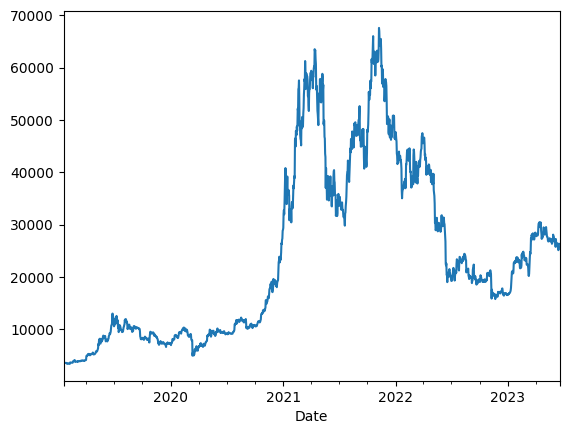

In [ ]:
print(df.head())
df['Close'].plot()
plt.show()

In [ ]:
df['Close'].fillna(method='ffill', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [ ]:
model = ARIMA(df['Close'], order=(0, 1, 0))

# Fit the model to the data
model_fit = model.fit()

# Generate predictions
predictions = model_fit.predict()

# Calculate residuals
residuals = df['Close'] - predictions

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
std_dev = np.std(residuals)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = 1.96 * std_dev  # For a large sample size

# Calculate upper and lower bounds
upper_bound = predictions + confidence_interval
lower_bound = predictions - confidence_interval

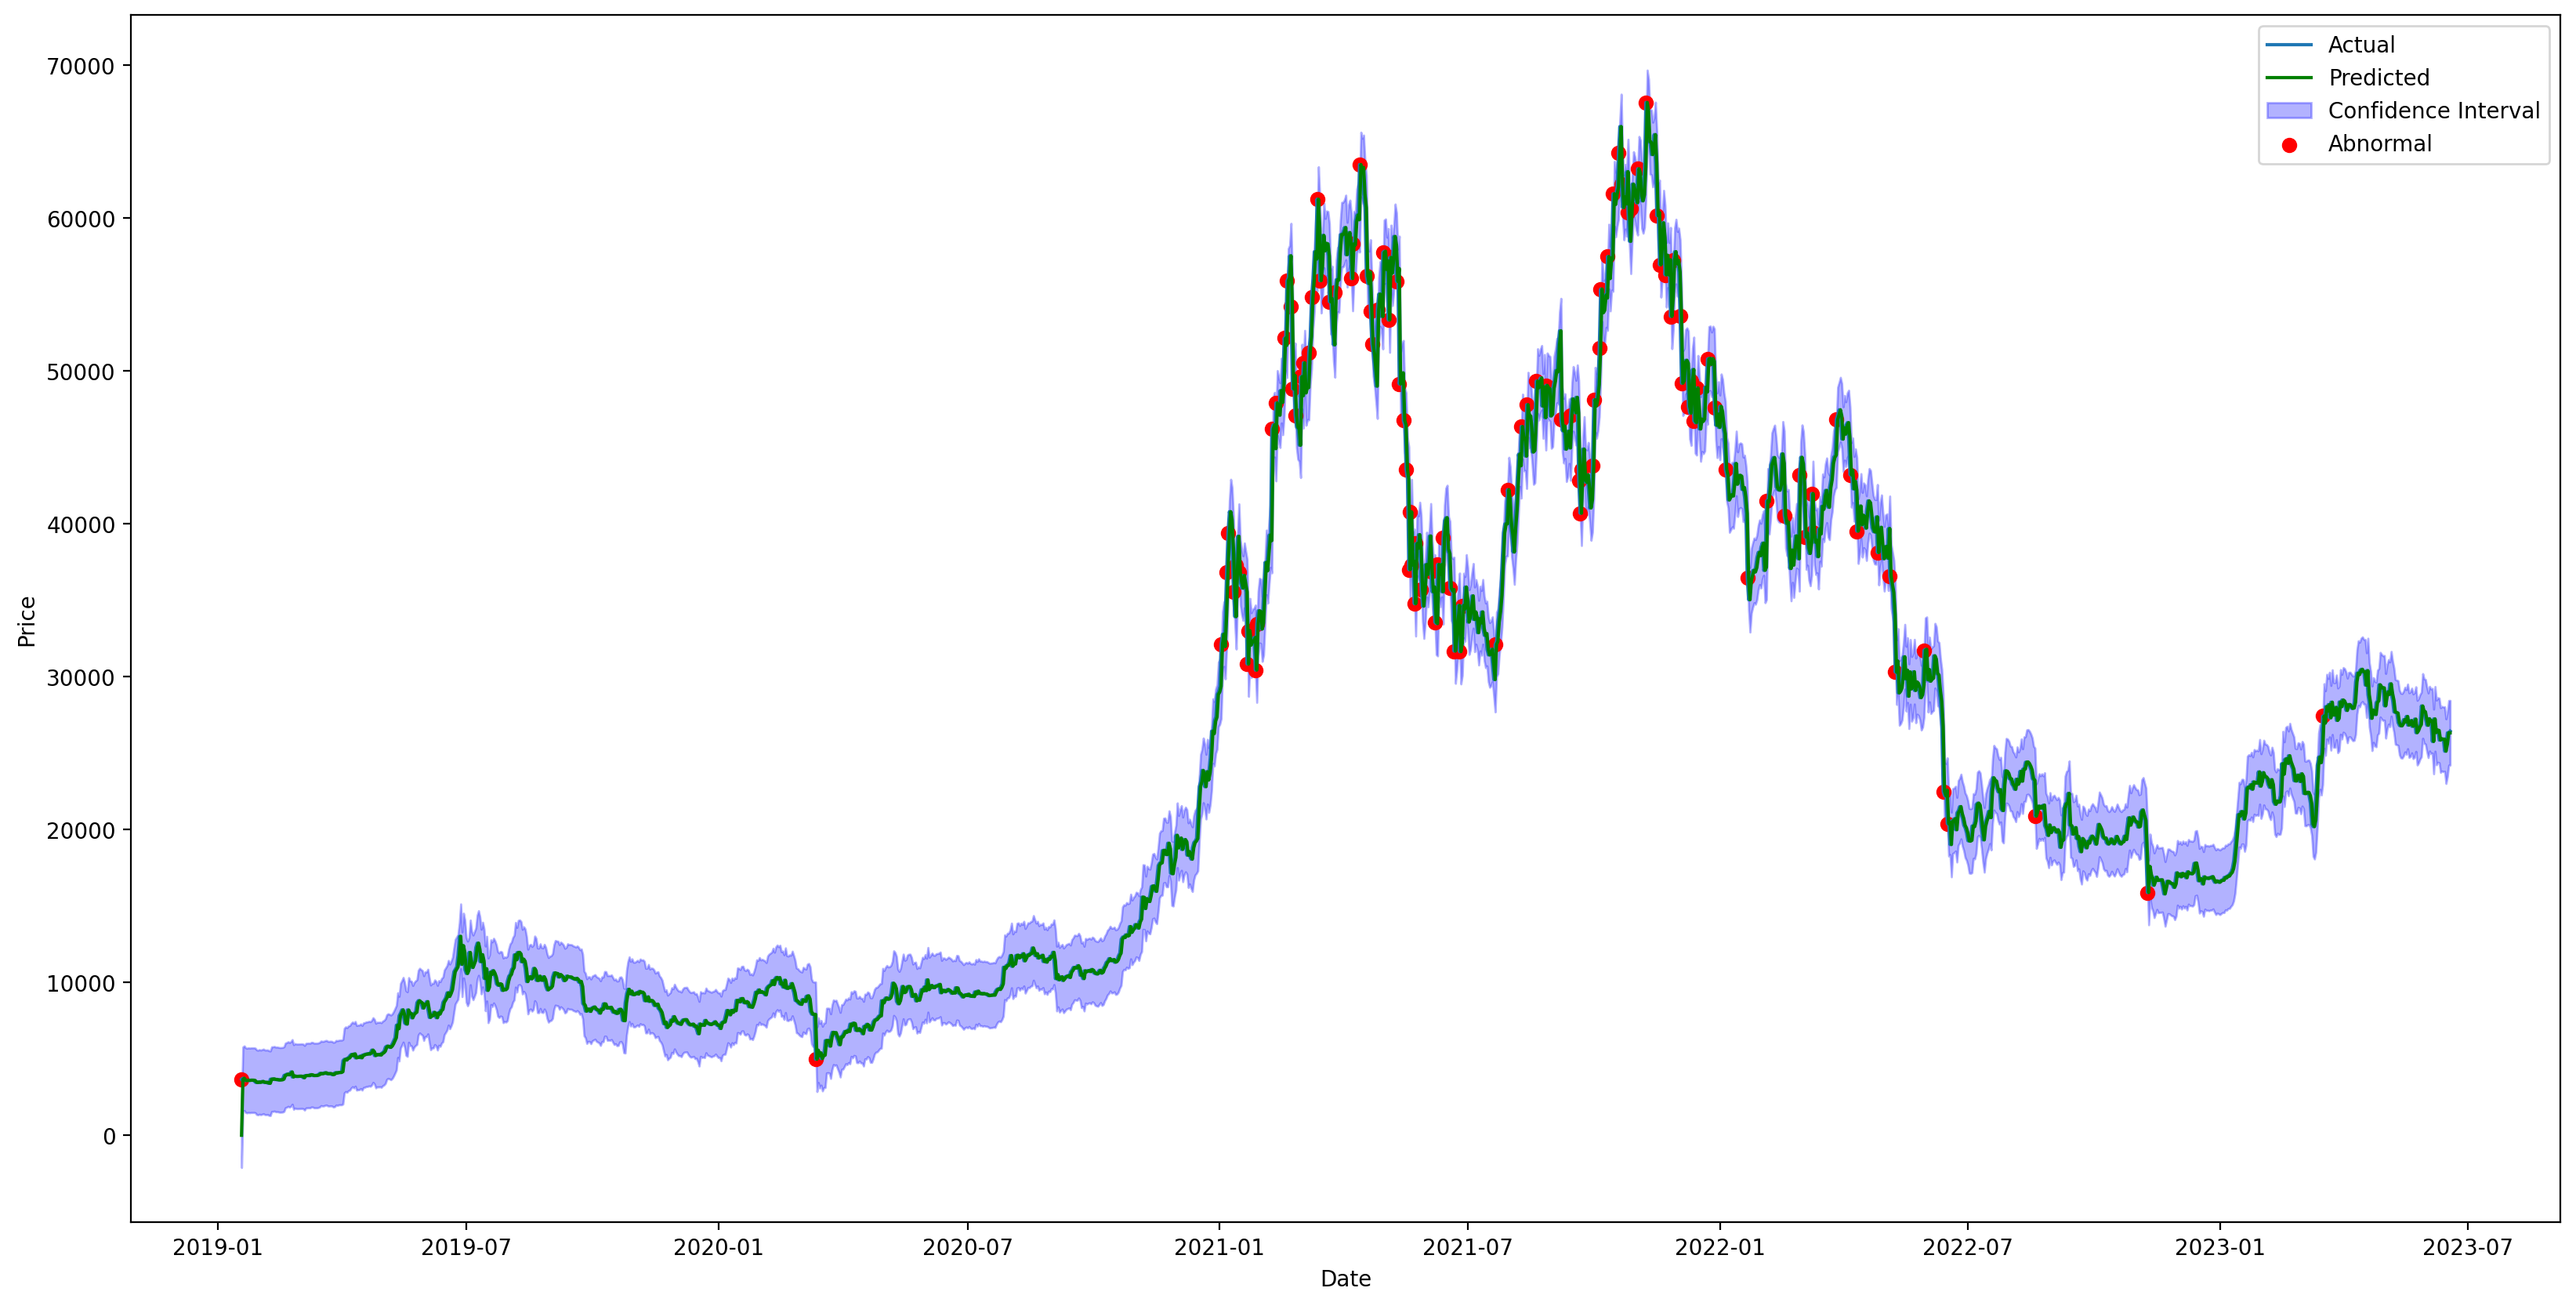

In [ ]:
plt.figure(figsize=(20, 10), dpi=200)

# Plot the original data
plt.plot(df.index, df['Close'], label='Actual')

# Plot the predicted values
plt.plot(df.index, predictions, color='green', label='Predicted')

# Plot the confidence interval
plt.fill_between(df.index, lower_bound, upper_bound, color='blue', alpha=0.3, label='Confidence Interval')

# Plot abnormal circumstances as red dots
abnormal_indices = np.where((df['Close'] > upper_bound) | (df['Close'] < lower_bound))
abnormal_dates = df.index[abnormal_indices]
abnormal_values = df['Close'].loc[abnormal_dates]
plt.scatter(abnormal_dates, abnormal_values, color='red', label='Abnormal')

# Add legend and labels
plt.legend()

plt.xlabel('Date')
plt.ylabel('Price')


# Show the plot
plt.show()

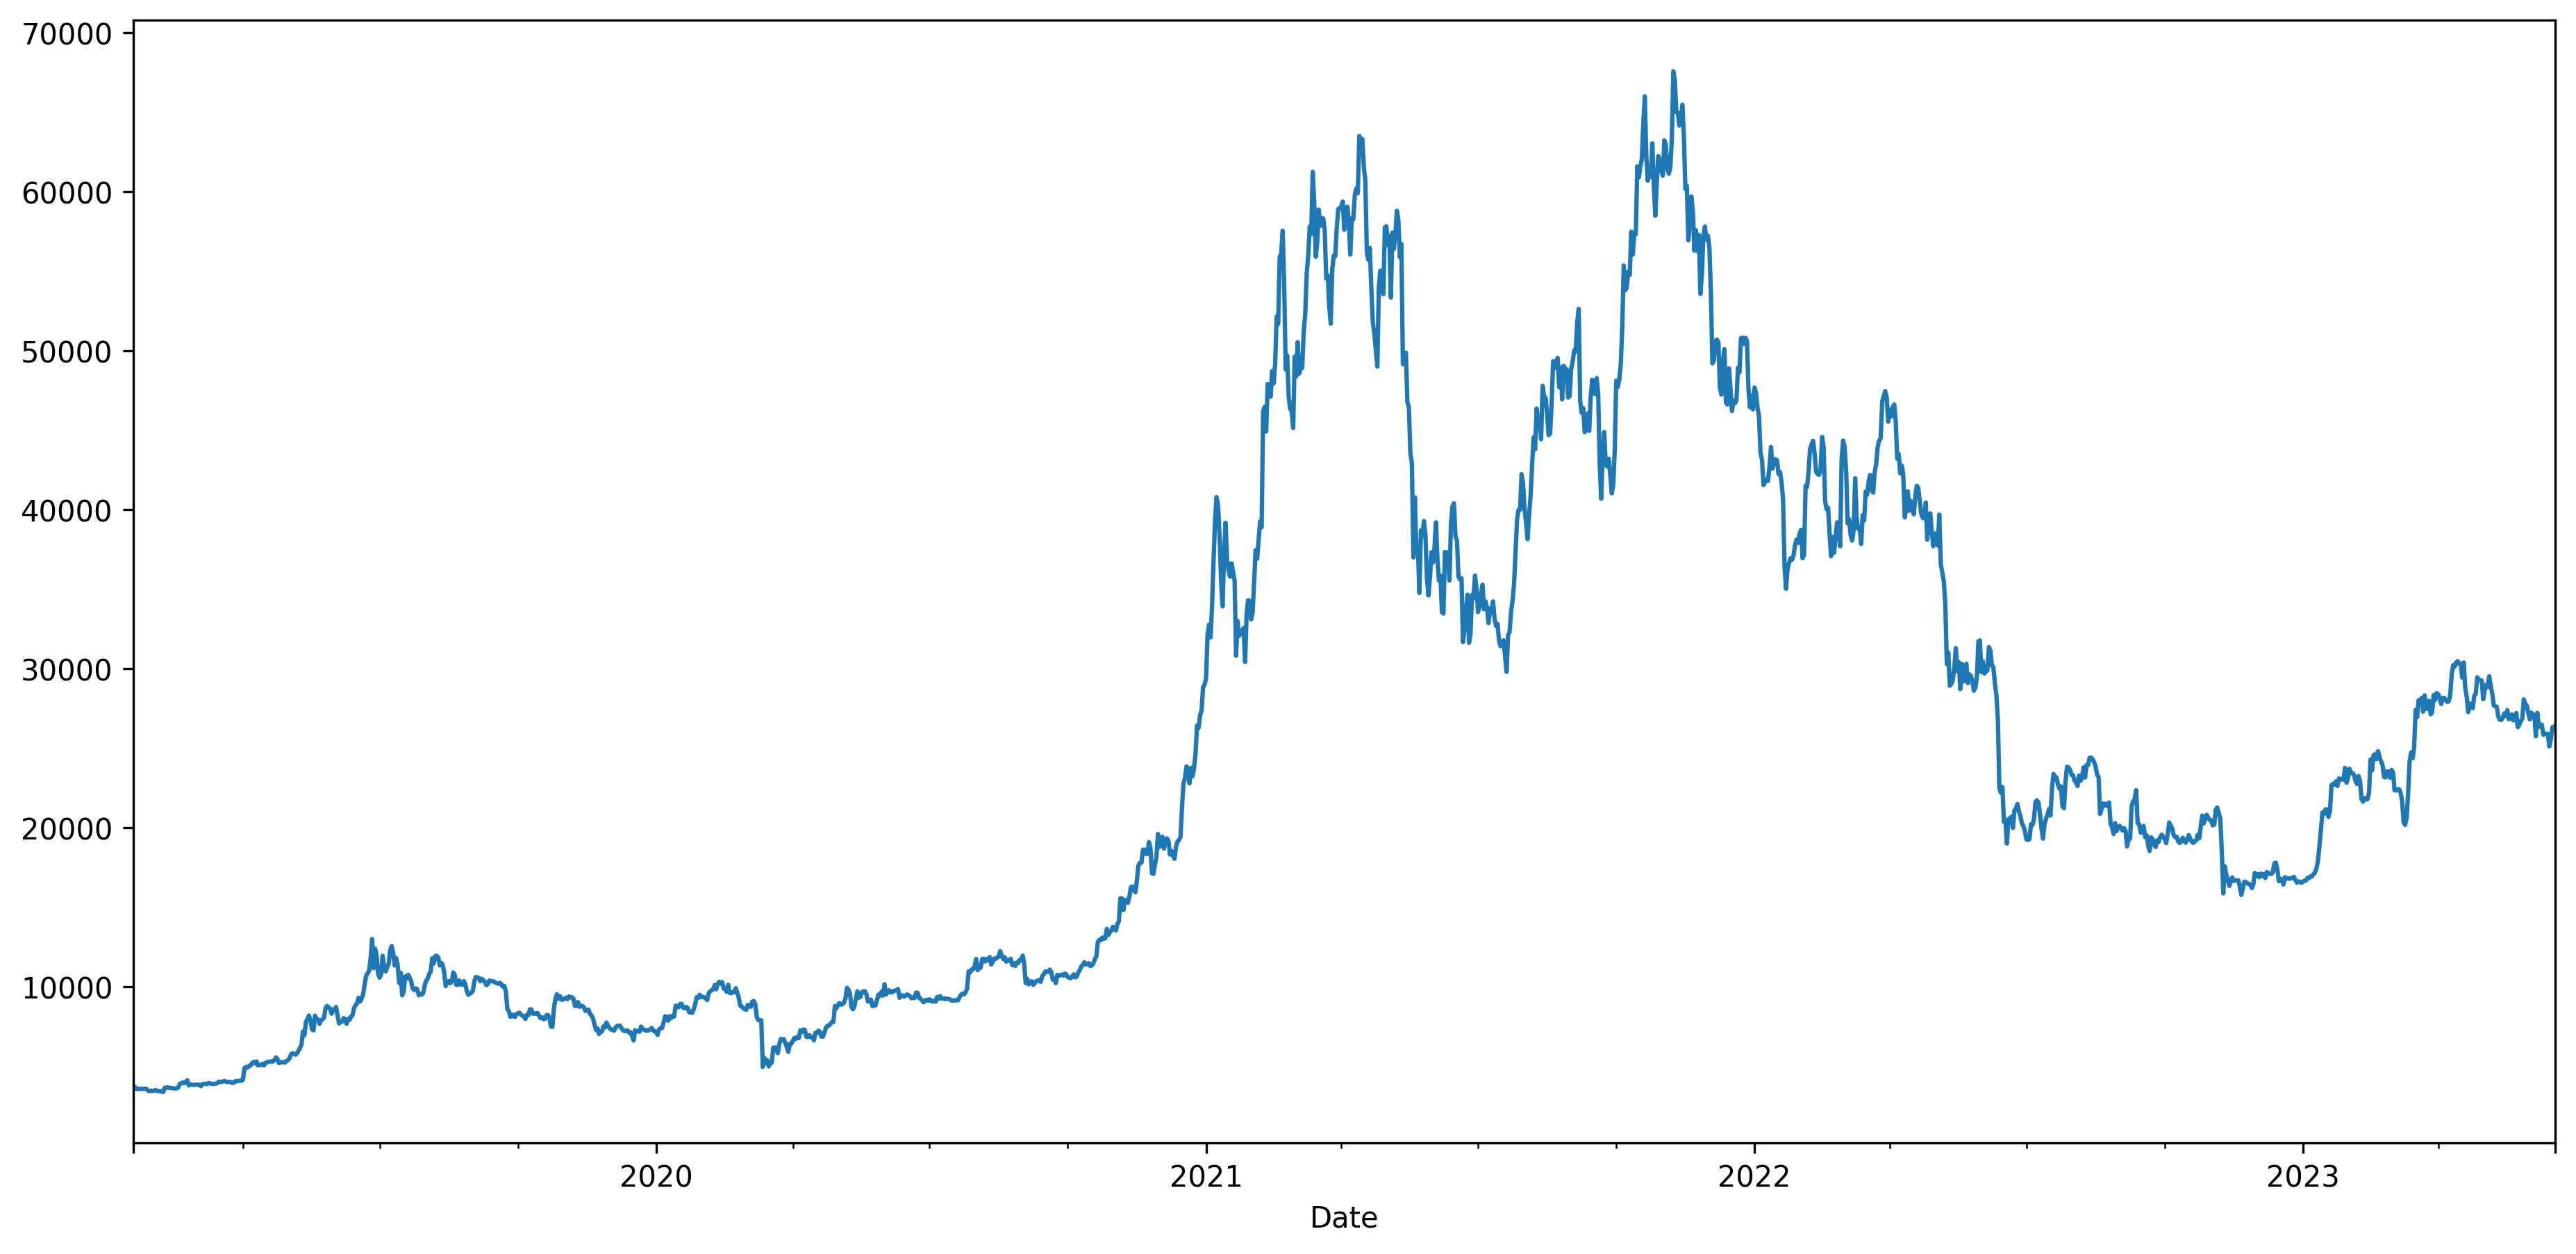

test: p=0.0


<Figure size 1500x700 with 0 Axes>

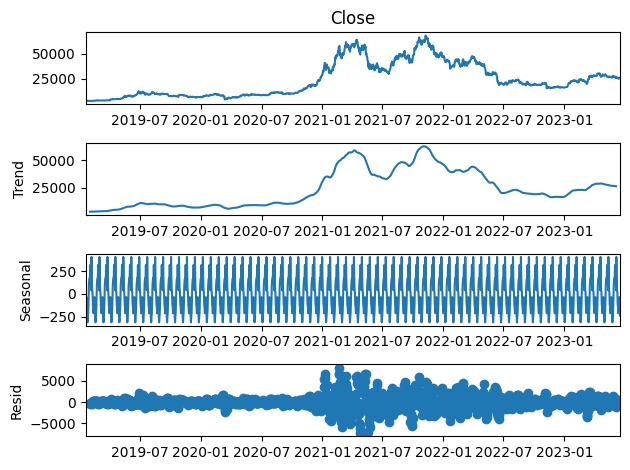

 12%|█▎        | 1/8 [00:03<00:24,  3.48s/it]

x(0, 0, 0, 24)12 - AIC:26968.538747273393


 25%|██▌       | 2/8 [00:30<01:42, 17.07s/it]

x(0, 0, 1, 24)12 - AIC:26586.205737994336


 38%|███▊      | 3/8 [01:04<02:05, 25.13s/it]

x(0, 1, 0, 24)12 - AIC:27470.939484995077


 50%|█████     | 4/8 [02:41<03:33, 53.28s/it]

x(0, 1, 1, 24)12 - AIC:26494.915078872644


 62%|██████▎   | 5/8 [03:06<02:09, 43.12s/it]

x(1, 0, 0, 24)12 - AIC:26585.803723237557


 75%|███████▌  | 6/8 [03:37<01:17, 38.91s/it]

x(1, 0, 1, 24)12 - AIC:26587.00918761258


 88%|████████▊ | 7/8 [05:44<01:07, 67.88s/it]

x(1, 1, 0, 24)12 - AIC:26776.61498749607


100%|██████████| 8/8 [07:39<00:00, 57.47s/it]

x(1, 1, 1, 24)12 - AIC:26494.501009604737
x(1, 1, 1, 24)12 - AIC:26494.501009604737


2019-01-18    -2115.343851
2019-01-19     1542.495504
2019-01-20     1613.224508
2019-01-21     1485.669821
2019-01-22     1460.688620
                  ...     
2023-06-14    23803.384665
2023-06-15    23009.331930
2023-06-16    23461.050680
2023-06-17    24212.119040
2023-06-18    24212.119040
Freq: D, Name: predicted_mean, Length: 1613, dtype: float64
2019-01-18     2115.343851
2019-01-19     5773.183206
2019-01-20     5843.912210
2019-01-21     5716.357523
2019-01-22     5691.376322
                  ...     
2023-06-14    28034.072367
2023-06-15    27240.019632
2023-06-16    27691.738382
2023-06-17    28442.806742
2023-06-18    28442.806742
Freq: D, Name: predicted_mean, Length: 1613, dtype: float64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4045      2.894      0.140      0.889      -5.268       6.077
ar.L2         -0.7287      1.376     -0.530      

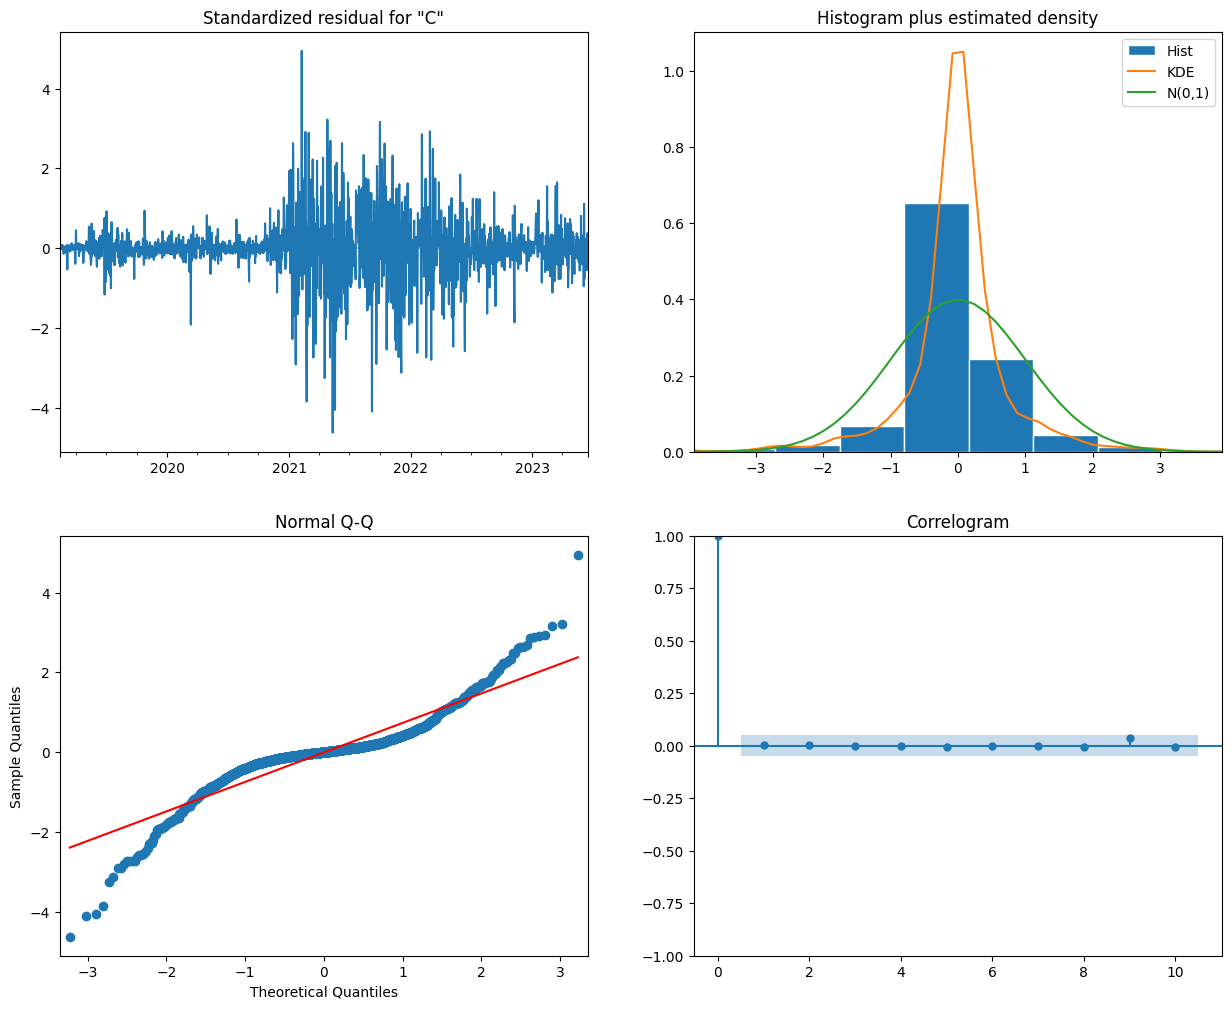

ValueError: ignored

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import tqdm
import itertools
import statsmodels.tsa.stattools as ts
import numpy as np
import warnings

df['Close'].fillna(method='ffill', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

warnings.filterwarnings('ignore')

columns =['Close']
for column in columns:
    data = df[column]  # 读取列数据并去掉空值
    # 画出时序图
    plt.figure(figsize=[15, 7], dpi=300)
    data.plot()
    plt.show()

    p_pingwen = adfuller(data)[1]  #  检验平稳性，p值小于0.05说明是平稳的
    p_baizaosheng = acorr_ljungbox(data, lags=1)['lb_pvalue'].values[0]  # #  检验是否为白噪声序列，p值小于0.05说明是非白噪声的

    # 对数据进行差分后得到 自相关图和 偏相关图
    diff = False  # 如果数据平稳的话就不需要进行差分了
    if diff:
        D_data = data.diff().dropna()
        D_data.columns = [column]
        D_data.plot()  # 画出差分后的时序图
        plt.show()
        p_pingwen = adfuller(D_data)[1]
        p_baizaosheng = acorr_ljungbox(D_data, lags=1)['lb_pvalue'].values[0]

    # 季节性分解
    decomposition = seasonal_decompose(data, period=24)  # 以一天为周期，以小时为粒度，所以周期是24
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=[15, 7])
    decomposition.plot()
    print("test: p={}".format(ts.adfuller(seasonal)[1]))
    plt.show()

    # 对模型进行定阶
    def optimize_ARIMA(order_list, exog):
        results = []

        for order in tqdm.tqdm(order_list):
            try:
                model = SARIMAX(exog, order=order).fit(disp=-1)
            except:
                continue

            aic = model.aic
            results.append([order, aic])

        result_df = pd.DataFrame(results)
        result_df.columns = ['(p, d, q)', 'AIC']
        # Sort in ascending order, lower AIC is better
        result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

        return result_df


    ps = range(0, 8, 1)  # 我们将尝试所有阶数 (p,q) 从 0 到 8 的组合，但保持差分阶数等于 1。
    qs = range(0, 8, 1)
    parameters = itertools.product(ps, qs)  # Create a list with all possible combination of parameters
    parameters_list = list(parameters)
    order_list = []
    for each in parameters_list:
        each = list(each)
        each.insert(1, 1)  # 元组中第二个1是指差分的阶数，一般都是1，差分太多了就会导致过差分
        each = tuple(each)
        order_list.append(each)

    result_df = optimize_ARIMA(order_list, exog=data)  # 得到的AIC最小的参数就是模型的最佳参数

    # 通过网格搜索对seasonal_order进行定阶
    def get_ARIMA_params(data, pdq, m=24):
        p = d = q = range(0, 2)
        seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(itertools.product(p, d, q))]
        score_aic = 1000000.0
        warnings.filterwarnings("ignore")  # specify to ignore warning messages
        for param_seasonal in tqdm.tqdm(seasonal_pdq):
            mod = sm.tsa.ARIMA(data,
                          order=pdq,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit()
            print('x{}12 - AIC:{}'.format(param_seasonal, results.aic))
            if results.aic < score_aic:
                score_aic = results.aic
                params = param_seasonal, score_aic
        param_seasonal, aic = params
        print('x{}12 - AIC:{}'.format(param_seasonal, aic))
        return param_seasonal, aic
    order = result_df.iloc[0, :].values[0]  # 这个order是ARIMA模型的参数，也就是前面result_df确定的最佳参数
    result_seasonal, aic = get_ARIMA_params(data, order, m=24)

    # 模型拟合
    pred_num = 0
    best_model = sm.tsa.ARIMA(data[:], order=result_df.iloc[0, :].values[0],  seasonal_order=result_seasonal).fit()  # 留出最后pred_num条数据不进行拟合，这是因为后面要对这pred_num条数据进行预测


    # Print or use the confidence interval bounds as needed
    print(lower_bound)
    print(upper_bound)

    # 模型拟合效果检查
    print(best_model.summary().tables[1])
    best_model.plot_diagnostics(figsize=(15, 12))
    plt.show()

    # 对拟合值的阈值上下限和真实值作图，并计算RMSE值作为评估参数
    predict_ts = best_model.predict(tpy='levels', start=0, end=len(data)-pred_num)[1:]  # 由于数据太长，这里只拟合最后500条数据的时序图；留出pred_num条数据，这是因为我们后面要进行预测，
    myts = data[:]
    predict_ts.index = myts.index
    predict_lower = best_model.get_prediction(tpy='levels', start=0, end=len(data)-pred_num).conf_int()[1:]['lower ' + column]  # 这里得到拟合值的阈值下限
    predict_upper = best_model.get_prediction(tpy='levels', start=0, end=len(data)-pred_num).conf_int()[1:]['upper ' + column]
    predict_lower.index = myts.index
    predict_upper.index = myts.index
    outliers = myts[(myts < predict_lower) | (myts > predict_upper)]  # 找出异常值
    outliers.plot(color='red', label='abnormal value', figsize=(12, 8), marker='o', linestyle='', linewidth=2)

    # predict_ts.plot(color='blue', label='拟合值', figsize=(12, 8), linestyle='-', linewidth=2)
    myts.plot(color='blue', label='true value', figsize=(12, 8), linestyle='-', linewidth=2)
    predict_lower.plot(color='green', label='down threshold', figsize=(12, 8), linestyle='--', linewidth=2)
    predict_upper.plot(color='green', label='upper threshold', figsize=(12, 8), linestyle='--', linewidth=2)
    plt.legend(loc='best')
    plt.title(column + 'The average error of fitting the original data is: %.4f' % np.sqrt(sum((predict_ts - myts) ** 2) / myts.size))

    # 向后做pred_num个步长的预测
    forecast_ts = best_model.forecast(pred_num)
    myts_fore = data[-pred_num:]
    forecast_lower = best_model.get_forecast(pred_num, alpha=0.05).conf_int()['lower '+column]
    forecast_upper = best_model.get_forecast(pred_num, alpha=0.05).conf_int()['upper '+column]
    forecast_ts.index, forecast_lower.index, forecast_upper.index = myts_fore.index, myts_fore.index, myts_fore.index  # 索引对齐
    outliers = myts_fore[(myts_fore < forecast_lower) | (myts_fore > forecast_upper)]
    outliers.plot(color='red', label='abnormal value', figsize=(12, 8), marker='o', linestyle='', linewidth=2)
    forecast_ts.plot(color='blue', label='predicted value', figsize=(12, 8), linestyle='-', linewidth=2)
    myts_fore.plot(color='green', label='true value', figsize=(12, 8), linestyle='-', linewidth=2)
    forecast_lower.plot(color='black', label='down threshold', figsize=(12, 8), linestyle='--', linewidth=2)
    forecast_upper.plot(color='black', label='v', figsize=(12, 8), linestyle='--', linewidth=2)
    plt.legend(loc='best')
    plt.title(column + 'prediction' + str(pred_num) + 'The average error of period data is: %.4f' % np.sqrt(sum((forecast_ts - myts_fore) ** 2) / myts_fore.size))





ValueError: ignored

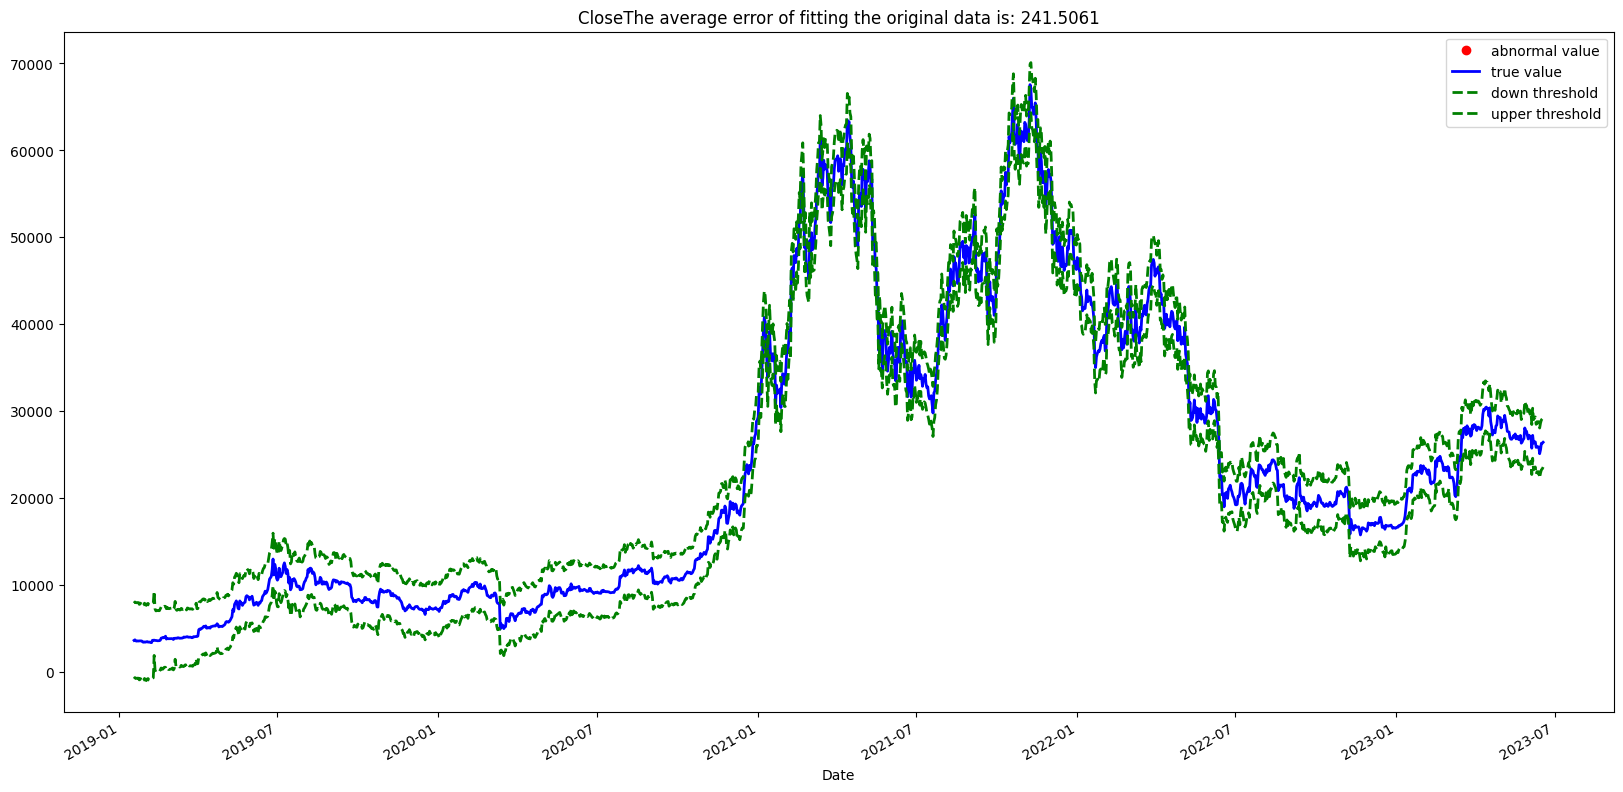

In [ ]:
predict_ts = best_model.predict(tpy='levels', start=0, end=len(data)-pred_num)[1:]  # 由于数据太长，这里只拟合最后500条数据的时序图；留出pred_num条数据，这是因为我们后面要进行预测，
myts = data[:]
predict_ts.index = myts.index
predict_lower = best_model.get_prediction(tpy='levels', start=0, end=len(data)-pred_num).conf_int()[1:]['lower ' + column]  # 这里得到拟合值的阈值下限
predict_upper = best_model.get_prediction(tpy='levels', start=0, end=len(data)-pred_num).conf_int()[1:]['upper ' + column]
predict_lower.index = myts.index
predict_upper.index = myts.index
outliers = myts[(myts < predict_lower) | (myts > predict_upper)]  # 找出异常值
outliers.plot(color='red', label='abnormal value', figsize=(20, 10), marker='o', linestyle='', linewidth=2)

# predict_ts.plot(color='blue', label='拟合值', figsize=(12, 8), linestyle='-', linewidth=2)
myts.plot(color='blue', label='true value', figsize=(20, 10), linestyle='-', linewidth=2)
predict_lower.plot(color='green', label='down threshold', figsize=(20, 10), linestyle='--', linewidth=2)
predict_upper.plot(color='green', label='upper threshold', figsize=(20, 10), linestyle='--', linewidth=2)
plt.legend(loc='best')
plt.title(column + 'The average error of fitting the original data is: %.4f' % np.sqrt(sum((predict_ts - myts) ** 2) / myts.size))

# 向后做pred_num个步长的预测
forecast_ts = best_model.forecast(pred_num)
myts_fore = data[-pred_num:]
forecast_lower = best_model.get_forecast(pred_num, alpha=0.05).conf_int()['lower '+column]
forecast_upper = best_model.get_forecast(pred_num, alpha=0.05).conf_int()['upper '+column]
forecast_ts.index, forecast_lower.index, forecast_upper.index = myts_fore.index, myts_fore.index, myts_fore.index  # 索引对齐
outliers = myts_fore[(myts_fore < forecast_lower) | (myts_fore > forecast_upper)]
outliers.plot(color='red', label='abnormal value', figsize=(20, 8), marker='o', linestyle='', linewidth=2)
forecast_ts.plot(color='blue', label='predicted value', figsize=(12, 8), linestyle='-', linewidth=2)
myts_fore.plot(color='green', label='true value', figsize=(12, 8), linestyle='-', linewidth=2)
forecast_lower.plot(color='black', label='down threshold', figsize=(12, 8), linestyle='--', linewidth=2)
forecast_upper.plot(color='black', label='v', figsize=(12, 8), linestyle='--', linewidth=2)
plt.legend(loc='best')
plt.title(column + 'prediction' + str(pred_num) + 'The average error of period data is: %.4f' % np.sqrt(sum((forecast_ts - myts_fore) ** 2) / myts_fore.size))




In [ ]:
pred_conf = best_model.conf_int()
# Extract the lower and upper confidence bounds
lower_bound = pred_conf.iloc[:, 0]
upper_bound = pred_conf.iloc[:, 1]

# Print or use the confidence interval bounds as needed
print(lower_bound)
print(upper_bound)

ar.L1      -6.441583e-01
ar.L2      -1.337185e+00
ar.L3      -4.907688e-01
ar.L4      -1.159685e+00
ar.L5       9.491905e-02
ar.L6      -1.217966e+00
ar.L7      -1.569451e-01
ma.L1      -1.645097e+00
ma.L2      -5.327013e-02
ma.L3      -2.036980e+00
ma.L4      -7.691286e-01
ma.L5      -1.358078e+00
ma.L6      -3.397172e-01
ar.S.L24    2.644407e-02
ma.S.L24   -1.004901e+00
sigma2      2.029771e+06
Name: 0, dtype: float64
ar.L1       1.611098e+00
ar.L2       1.063773e-01
ar.L3       2.034414e+00
ar.L4       8.010114e-01
ar.L5       1.323957e+00
ar.L6       4.076146e-01
ar.L7       1.451577e-02
ma.L1       6.152432e-01
ma.L2       1.344974e+00
ma.L3       5.020155e-01
ma.L4       1.185427e+00
ma.L5      -7.414737e-02
ma.L6       1.243060e+00
ar.S.L24    1.612212e-01
ma.S.L24   -9.146139e-01
sigma2      2.300680e+06
Name: 1, dtype: float64


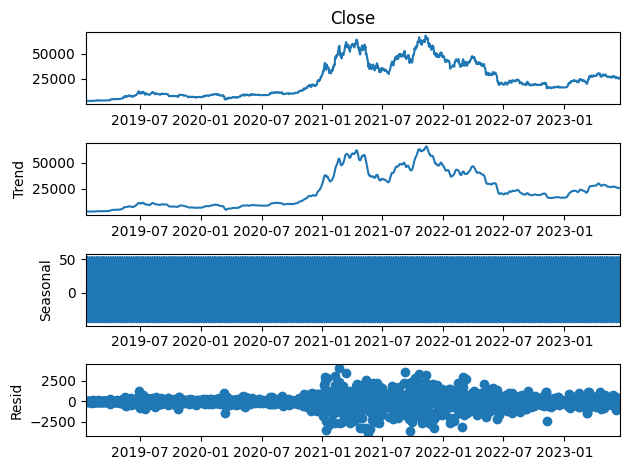

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1613
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -13539.708
Date:                Fri, 07 Jul 2023   AIC                          27083.416
Time:                        07:31:56   BIC                          27094.187
Sample:                    01-18-2019   HQIC                         27087.414
                         - 06-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0312      0.017     -1.785      0.074      -0.065       0.003
sigma2      1.159e+06   1.82e+04     63.584      0.000    1.12e+06    1.19e+06
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
# Fill missing values if any
df['Close'].fillna(method='ffill', inplace=True)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
# Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(df['Close'], model='additive')
decomposition.plot()
plt.show()
# Perform a time series model, such as ARIMA
# Find optimal (p, d, q) values using auto_arima
model = sm.tsa.ARIMA(df['Close'], order=(0, 1, 1))
results = model.fit()
print(results.summary())

1079.0498097490715


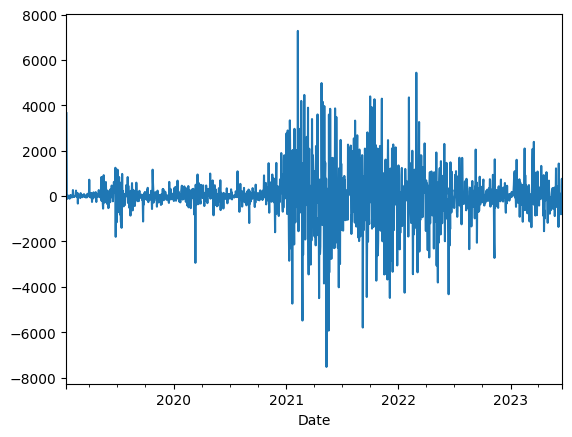

Date
2019-01-18    3.374224
2020-03-12   -2.740830
2021-01-06    2.666492
2021-01-11   -2.656343
2021-01-13    3.079099
2021-01-21   -4.407331
2021-01-28    2.734104
2021-02-08    6.733668
2021-02-11    2.711678
2021-02-17    2.753044
2021-02-19    3.873526
2021-02-22   -3.062202
2021-02-23   -5.099178
2021-03-01    4.118123
2021-03-13    3.596822
2021-03-15   -3.214604
2021-03-22   -2.813415
2021-03-26    3.133313
2021-04-13    3.321307
2021-04-18   -4.183237
2021-04-26    4.603078
2021-04-30    3.835258
2021-05-04   -3.583754
2021-05-05    3.663919
2021-05-12   -6.994031
2021-05-15   -2.902355
2021-05-17   -2.731977
2021-05-19   -5.510659
2021-05-20    3.316396
2021-05-21   -3.135015
2021-05-24    3.551646
2021-06-09    3.568538
2021-06-13    3.219041
2021-06-21   -3.740470
2021-06-25   -2.790464
2021-08-13    3.069185
2021-09-07   -5.384454
2021-09-20   -4.137044
2021-10-01    4.058252
2021-10-06    3.619423
2021-10-15    3.942674
2021-10-21   -3.469161
2021-11-08    3.965932
2021-1

In [ ]:
# Calculate the residuals
residuals = results.resid
residuals_std = residuals.std()
print(residuals_std)
# Plot the residuals
residuals.plot()
plt.show()
threshold = 2.6
# Check for outliers using z-scores
z_scores = (residuals - residuals.mean()) / residuals.std()
outliers = z_scores[abs(z_scores) > threshold]
print(outliers)
print(len(outliers))

print(len(outliers)/1613)

In [ ]:
# For SRIMAX
order = (p, d, q)
seasonal_order = (P, D, Q, S)

In [ ]:
model = SARIMAX(df['Close'], order=order, seasonal_order=seasonal_order)
results = model.fit()
print(results.summary())